In [1]:
%matplotlib notebook
import numpy as np
from sympy import *
#from sympy.abc import a,b
init_printing()
import math
from sympy.printing.theanocode import theano_function
from matplotlib import pyplot as plt
from pyphysim.util.misc import randn_c


In [2]:
a,b = symbols('a b', complex=True)

$\newcommand\vtW{\mathbf{w}}$
$\newcommand\vtP{\mathbf{p}}$
$\newcommand\mtR{\mathbf{R}}$

The Winer solution is given by $\vtW = \mtR^{-1}\vtP$

$$\mtR = \begin{bmatrix}
     r[0] & r[1] \\
     r[-1] & r[0]
     \end{bmatrix}$$

In [3]:
M = 2
h = Matrix([a, b], size=(2,1))
h

In [6]:
def idx_h(i):
    """Indexa h retornando um elemento de h ou zero caso o índice caia fora."""
    if i < 0: return 0
    if i > 1: return 0
    return h[i]

def r(m):
    out = idx_h(0) * idx_h(-m).conjugate()
    for i in range(1, M):
        out = out + idx_h(i) * idx_h(i-m).conjugate()
    return out

In [5]:
R = Matrix([[r(0), r(1)], [r(-1), r(0)]])
R = R.subs(a*a.conjugate(),abs(a)**2).subs(b*b.conjugate(),abs(b)**2)

In [7]:
Rdet = R.det()
Rdet

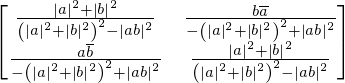

In [8]:
Rinv = R.inv()
Rinv.simplify()
Rinv.subs(a*b*a.conjugate()*b.conjugate(), abs(a*b)**2)

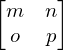

In [9]:
m,n,o,p = symbols("m n o p")
M = Matrix([[m,n],[o,p]])
Minv = M.inv()
Minv.simplify()
M

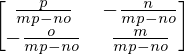

In [10]:
Minv

# Item e

In [2]:
def calc_y(data):
    out = np.zeros_like(data)
    for n in range(data.size):
        for i in range(2):
            if n-i >= 0:
                out[n] = out[n] + h[i]*data[n-i]
    return out

In [17]:
M=6
h = np.array([4, -5])
def compute_MSE(M=6):

    r_vec = np.vectorize(r)
    A = np.fromfunction(lambda x,y:-x+y, shape=(M,M), dtype=int)
    #A

    R = r_vec(A)
    #print(R)

    p = np.hstack([np.zeros(M-h.size), h[::-1]])
    #p

    w = np.linalg.inv(R) @ p
    #w

    data = randn_c(10000000)
    y = np.convolve(data, h)[:-1]

    tilde_y = np.convolve(w.conj(),y)
    
    mean_mse = np.mean(np.abs(data - tilde_y[M-1:])**2)
    return mean_mse

In [21]:
mean_mse_for_all_M = np.array(list(compute_MSE(i) for i in range(2,51)))


In [20]:
compute_MSE(6)

<IPython.core.display.Javascript object>


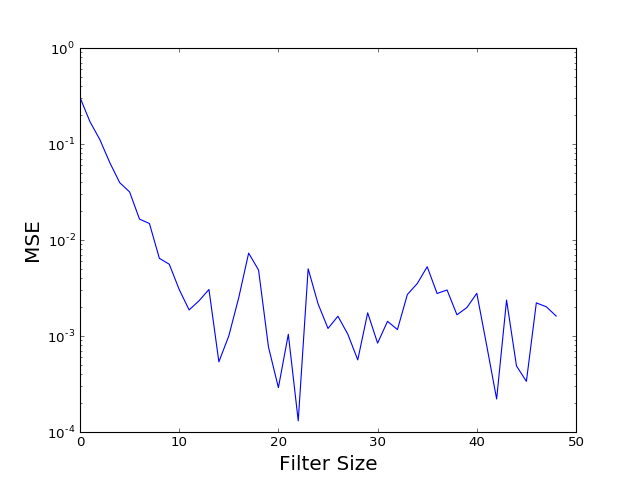

In [22]:
plt.semilogy(mean_mse_for_all_M)
plt.ylabel("MSE", fontsize=18)
plt.xlabel("Filter Size", fontsize=18)
#plt.savefig("mse_for_varying_M.png")